In [4]:
import numpy as np
import matplotlib.pyplot as plt #for plots
import matplotlib as mpl
%matplotlib inline 
from matplotlib import cm
import pandas as pd

mpl.rcParams['font.size'] = 12

from sklearn import datasets ## imports datasets from scikit-learn

from scipy import stats

import statsmodels.api as sm

import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #have to add this in



In [6]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [20]:
movies.isna().sum()

Year                           107
Genres                           0
Language                        11
Country                          4
Content Rating                 302
Duration                        14
Aspect Ratio                   328
Budget                         491
Gross Earnings                 883
Director                       104
Actor 1                          7
Actor 2                         13
Actor 3                         22
Facebook Likes - Director      104
Facebook Likes - Actor 1         7
Facebook Likes - Actor 2        13
Facebook Likes - Actor 3        22
Facebook Likes - cast Total      0
Facebook likes - Movie           0
Facenumber in posters           13
User Votes                       0
Reviews by Users                20
Reviews by Crtiics              49
IMDB Score                       0
dtype: int64

In [18]:
movies.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


In [33]:
movies.corr()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


In [34]:
movies.corr() >= 0.5

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Aspect Ratio,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Budget,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Gross Earnings,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
Facebook Likes - Director,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Facebook Likes - Actor 1,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
Facebook Likes - Actor 2,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
Facebook Likes - Actor 3,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
Facebook Likes - cast Total,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False


Things with highest correlations

gross earnings & user votes & reviews by users 

Facebook likes actor 2 & facebook likes actor 3 

Facebook likes - cast total & facebook likes actor 1 & 2 

facebook likes movie & user votes user votes & reviews by users & reviews by critics

<Figure size 576x360 with 0 Axes>

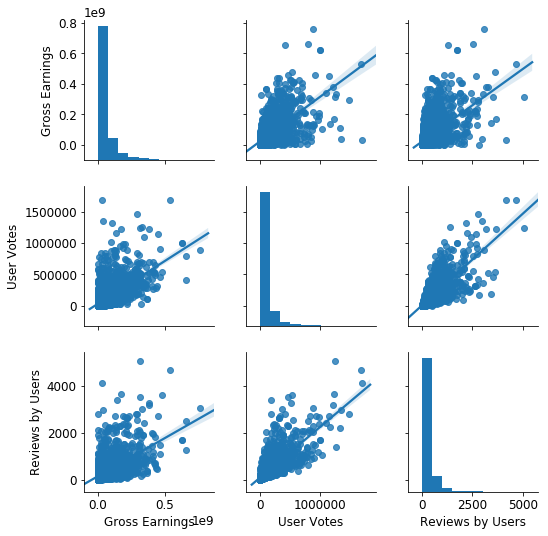

In [32]:
#gross earnings & user votes & reviews by users

plt.figure(figsize=(8,5))
seaborn.pairplot(movies, vars=['Gross Earnings', 'User Votes', 'Reviews by Users'],
                               kind='reg')